In [1]:
import numpy as np
import pandas as pd
import pyswarms as ps
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc

In [3]:
df = pd.read_csv('dataset.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


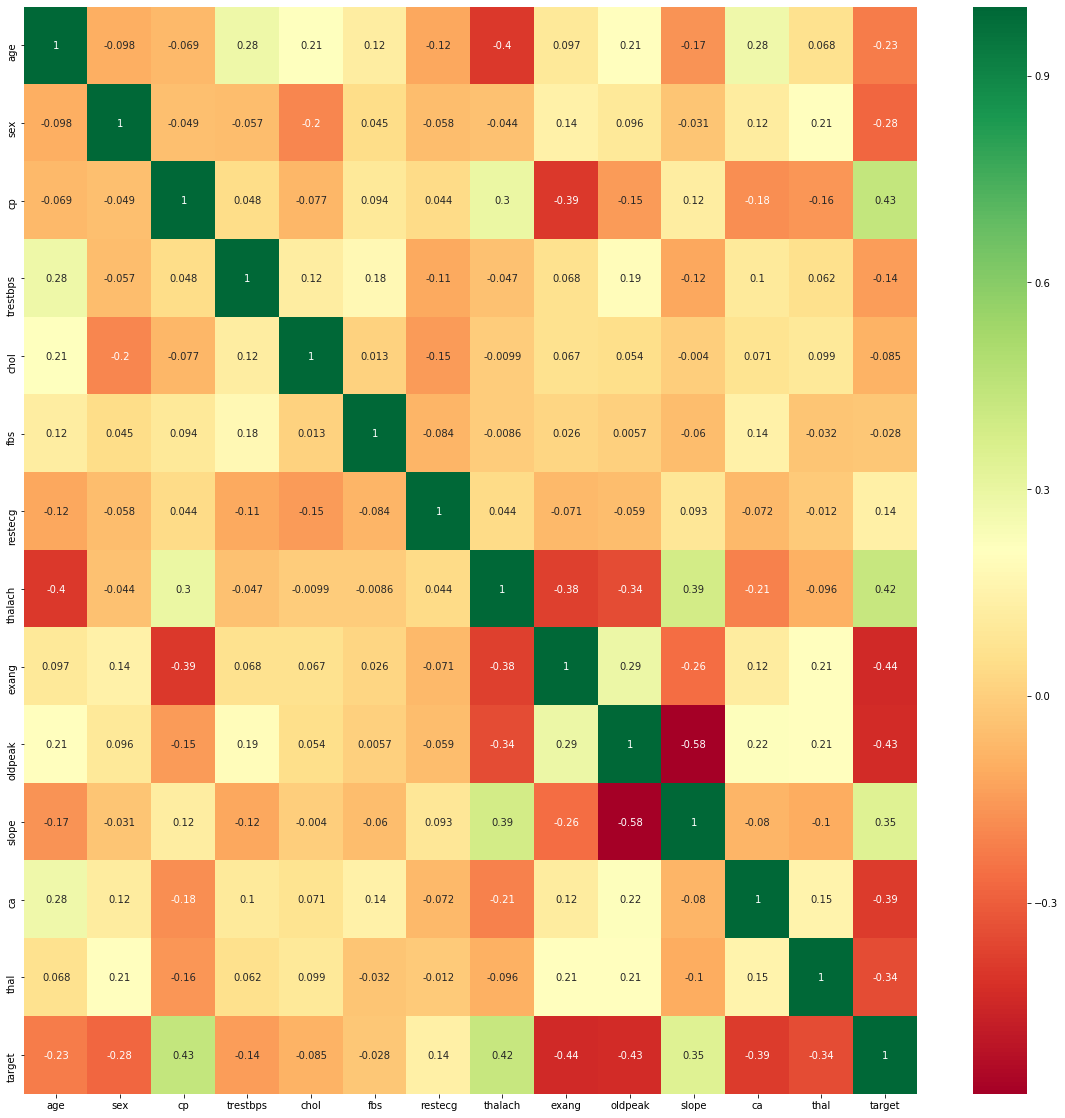

In [6]:
import seaborn as sns
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a22ca8588>,
      dtype=object)

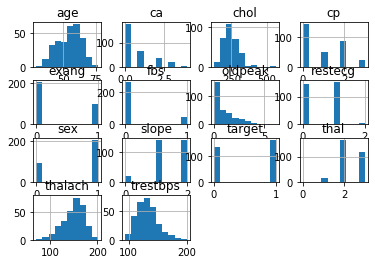

In [7]:
df.hist()

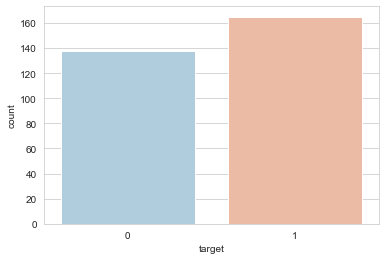

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='target',data=df,palette='RdBu_r')

In [9]:
dataset = pd.get_dummies(df, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

In [11]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [12]:
y = dataset['target']
X = dataset.drop(['target'], axis = 1)

trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)

In [13]:
from sklearn.model_selection import cross_val_score
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,X,y,cv=10)
    knn_scores.append(score.mean())

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

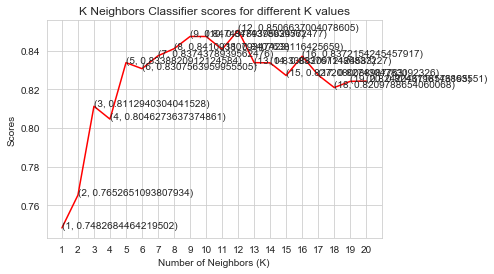

In [14]:
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

0.8338820912124584


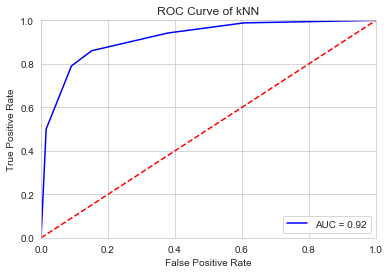

In [15]:
knn_classifier = KNeighborsClassifier(n_neighbors = 5)
score=cross_val_score(knn_classifier,X,y,cv=10)
print(score.mean())

knn_classifier.fit(trainX,trainy)
y_scores = knn_classifier.predict_proba(testX)
fpr, tpr, threshold = roc_curve(testy, y_scores[:, 1])
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

0.8306637004078606


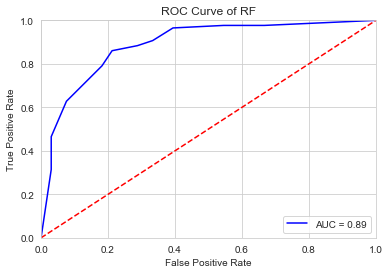

Accuracy: 0.830664 (+/- 0.075757) [Random Forest]
Accuracy: 0.833882 (+/- 0.077539) [Knn]
Accuracy: 0.830549 (+/- 0.069766) [Ensemble]


In [16]:
from sklearn.ensemble import RandomForestClassifier
randomforest_classifier= RandomForestClassifier(n_estimators=10, random_state=1)
score=cross_val_score(randomforest_classifier,X,y,cv=10)
print(score.mean())

randomforest_classifier.fit(trainX,trainy)
y_scores = randomforest_classifier.predict_proba(testX)
fpr, tpr, threshold = roc_curve(testy, y_scores[:, 1])
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of RF')
plt.show()

from sklearn.ensemble import VotingClassifier
eclf = VotingClassifier(estimators=[('rf',randomforest_classifier),('knn',knn_classifier)], voting='soft', weights=[1,2])
for clf, label in zip([randomforest_classifier,knn_classifier,eclf],['Random Forest', 'Knn', 'Ensemble']):
    scores = cross_val_score(clf,X,y, scoring='accuracy', cv=10)
    print("Accuracy: %f (+/- %f) [%s]" % (scores.mean(), scores.std(), label))

In [17]:
df = pd.read_csv("dataset.csv")

In [18]:
df.iloc[0:12]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [19]:
from sklearn import linear_model
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import pyswarms as ps

0.800956618464961


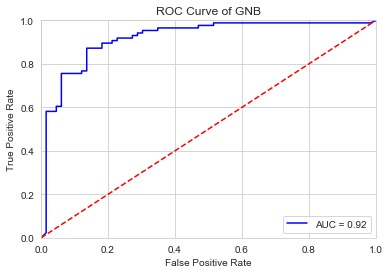

In [20]:
classifier = linear_model.LogisticRegression()

gnb = GaussianNB()
gnb.fit(X,y)
score = cross_val_score(gnb,X,y,cv=10)
print(score.mean())

gnb.fit(trainX,trainy)
y_scores = gnb.predict_proba(testX)
fpr, tpr, threshold = roc_curve(testy, y_scores[:, 1])
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of GNB')
plt.show()

In [21]:
df = pd.read_csv("dataset.csv")

In [22]:
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [23]:
df= df.rename(columns ={'age':0,'sex':1,'cp':2,'trestbps':3,'chol':4,'fbs':5,'restecg':6,'thalach':7,'exang':8,'oldpeak':9,'slope':10,'ca':11,'thal':12 })
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [24]:
zf = df.copy()
zf.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [25]:
zf.drop(['target'],axis=1)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2


In [26]:
y=np.array(df['target'])
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [27]:
zf['target']
features_name=[0,1,2,3,4,5,6,7,8,9,10,11,12]
X=np.array(df[features_name])
X

array([[63.,  1.,  3., ...,  0.,  0.,  1.],
       [37.,  1.,  2., ...,  0.,  0.,  2.],
       [41.,  0.,  1., ...,  2.,  0.,  2.],
       ...,
       [68.,  1.,  0., ...,  1.,  2.,  3.],
       [57.,  1.,  0., ...,  1.,  1.,  3.],
       [57.,  0.,  1., ...,  1.,  1.,  2.]])

In [28]:
features_name=[0,1,2,3,4,5,6,7,8,9,10,11,12]
x=np.array(df[features_name])
y=np.array(df['target'])

def f_per_particle(m, alpha):
    total_features = 13
    if np.count_nonzero(m) == 0:
        X_subset = X
    else:
        X_subset = X[:,m==1]
    knn_classifier = KNeighborsClassifier(n_neighbors = 12)
    score=cross_val_score(knn_classifier,X_subset,y,cv=10)
    P=score.mean()
    #classifier.fit(X_subset, y)
    #P = (classifier.predict(X_subset) == y).mean()
    j = (alpha * (1.0 - P)
        + (1.0 - alpha) * (1 - (X_subset.shape[1] / total_features)))
    return j

def f(x, alpha=0.88):
    n_particles = x.shape[0]
    j = [f_per_particle(x[i], alpha) for i in range(n_particles)]
    return np.array(j)


options = {'c1': 1.47, 'c2': 1.47, 'w':0.7, 'k': 30, 'p':2}


dimensions = 13 
optimizer = ps.discrete.BinaryPSO(n_particles=303, dimensions=dimensions, options=options)
optimizer.reset()


cost, pos = optimizer.optimize(f ,iters=35)
print(pos)

X_selected_features = X[:,pos==1]

df1 = pd.DataFrame(X_selected_features)
df1['target'] = pd.Series(y)

#sns.pairplot(df, hue='target')
#sns.pairplot(df1, hue='target')

#plt.show()

df1.to_csv("dataset1.csv")


2020-06-05 18:02:38,553 - pyswarms.discrete.binary - INFO - Optimize for 35 iters with {'c1': 1.47, 'c2': 1.47, 'w': 0.7, 'k': 30, 'p': 2}
pyswarms.discrete.binary: 100%|██████████|35/35, best_cost=0.177
2020-06-05 18:07:07,324 - pyswarms.discrete.binary - INFO - Optimization finished | best cost: 0.17725322152819384, best pos: [0 1 1 0 0 1 1 0 1 1 1 1 1]


[0 1 1 0 0 1 1 0 1 1 1 1 1]


In [29]:
cf = pd.read_csv("dataset1.csv")
cf = cf.loc[:, ~cf.columns.str.contains('^Unnamed')]
cf.head()

,0,1,2,3,4,5,6,7,8,target
0,1.0,3.0,1.0,0.0,0.0,2.3,0.0,0.0,1.0,1
1,1.0,2.0,0.0,1.0,0.0,3.5,0.0,0.0,2.0,1
2,0.0,1.0,0.0,0.0,0.0,1.4,2.0,0.0,2.0,1
3,1.0,1.0,0.0,1.0,0.0,0.8,2.0,0.0,2.0,1
4,0.0,0.0,0.0,1.0,1.0,0.6,2.0,0.0,2.0,1


In [30]:
# cf1 = pd.get_dummies(cf, columns = ['0','1','2','3','5','6','7'])
# cf1.head()

# col_scale=['6']
# cf1[col_scale] = standardScaler.fit_transform(cf1[col_scale])
# cf1.head()

In [31]:
b = cf['target']
a = cf.drop(['target'], axis = 1)

trainX, testX, trainy, testy = train_test_split(a, b, test_size=0.5, random_state=2)

0.8474378939562477


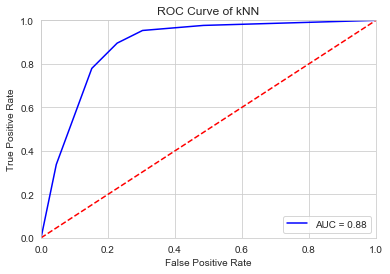

In [32]:
knn_classifier = KNeighborsClassifier(n_neighbors = 5)
score=cross_val_score(knn_classifier,a,b,cv=10)
print(score.mean())

knn_classifier.fit(trainX,trainy)
y_scores = knn_classifier.predict_proba(testX)
fpr, tpr, threshold = roc_curve(testy, y_scores[:, 1])
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

0.8276529477196884


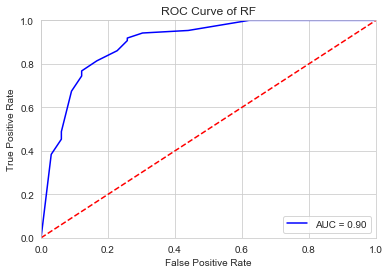

In [33]:
from sklearn.ensemble import RandomForestClassifier
randomforest_classifier= RandomForestClassifier(n_estimators=10, random_state=1)
score=cross_val_score(randomforest_classifier,a,b,cv=10)
print(score.mean())

randomforest_classifier.fit(trainX,trainy)
y_scores = randomforest_classifier.predict_proba(testX)
fpr, tpr, threshold = roc_curve(testy, y_scores[:, 1])
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of RF')
plt.show()

0.8072932888394513


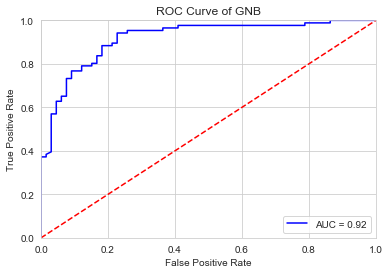

0         1.0
1         2.0
2         0.0
3         1.0
4         1.0
5         1.6
6         1.0
7         1.0
8         1.0
target    1.0
dtype: float64


In [34]:
gnb = GaussianNB()
gnb.fit(X,y)
score = cross_val_score(gnb,a,b,cv=10)
print(score.mean())

gnb.fit(trainX,trainy)
y_scores = gnb.predict_proba(testX)
fpr, tpr, threshold = roc_curve(testy, y_scores[:, 1])
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of GNB')
plt.show()

Q1 = cf.quantile(0.25)
Q3 = cf.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

In [35]:
#print(cf1 < (Q1 - 1.5 * IQR)) |(cf1 > (Q3 + 1.5 * IQR))
from sklearn.ensemble import VotingClassifier
eclf = VotingClassifier(estimators=[('rf',randomforest_classifier),('knn',knn_classifier)], voting='soft', weights=[1,2])
for clf, label in zip([randomforest_classifier,knn_classifier,eclf],['Random Forest', 'Knn', 'Ensemble']):
    scores = cross_val_score(clf,a,b, scoring='accuracy', cv=10)
    print("Accuracy: %f (+/- %f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.827653 (+/- 0.066293) [Random Forest]
Accuracy: 0.847438 (+/- 0.047737) [Knn]
Accuracy: 0.840426 (+/- 0.061309) [Ensemble]


In [36]:
cf1_out = cf[~((cf < (Q1 - 1.5 * IQR)) |(cf > (Q3 + 1.5 * IQR))).any(axis=1)]
print(cf1_out.shape)

(236, 10)


In [37]:
cf.head()

,0,1,2,3,4,5,6,7,8,target
0,1.0,3.0,1.0,0.0,0.0,2.3,0.0,0.0,1.0,1
1,1.0,2.0,0.0,1.0,0.0,3.5,0.0,0.0,2.0,1
2,0.0,1.0,0.0,0.0,0.0,1.4,2.0,0.0,2.0,1
3,1.0,1.0,0.0,1.0,0.0,0.8,2.0,0.0,2.0,1
4,0.0,0.0,0.0,1.0,1.0,0.6,2.0,0.0,2.0,1


In [38]:
d = cf['target']
c = cf.drop(['target'], axis = 1)
print(c)
print(d)

       0    1    2    3    4    5    6    7    8
0    1.0  3.0  1.0  0.0  0.0  2.3  0.0  0.0  1.0
1    1.0  2.0  0.0  1.0  0.0  3.5  0.0  0.0  2.0
2    0.0  1.0  0.0  0.0  0.0  1.4  2.0  0.0  2.0
3    1.0  1.0  0.0  1.0  0.0  0.8  2.0  0.0  2.0
4    0.0  0.0  0.0  1.0  1.0  0.6  2.0  0.0  2.0
5    1.0  0.0  0.0  1.0  0.0  0.4  1.0  0.0  1.0
6    0.0  1.0  0.0  0.0  0.0  1.3  1.0  0.0  2.0
7    1.0  1.0  0.0  1.0  0.0  0.0  2.0  0.0  3.0
8    1.0  2.0  1.0  1.0  0.0  0.5  2.0  0.0  3.0
9    1.0  2.0  0.0  1.0  0.0  1.6  2.0  0.0  2.0
10   1.0  0.0  0.0  1.0  0.0  1.2  2.0  0.0  2.0
11   0.0  2.0  0.0  1.0  0.0  0.2  2.0  0.0  2.0
12   1.0  1.0  0.0  1.0  0.0  0.6  2.0  0.0  2.0
13   1.0  3.0  0.0  0.0  1.0  1.8  1.0  0.0  2.0
14   0.0  3.0  1.0  0.0  0.0  1.0  2.0  0.0  2.0
15   0.0  2.0  0.0  1.0  0.0  1.6  1.0  0.0  2.0
16   0.0  2.0  0.0  1.0  0.0  0.0  2.0  0.0  2.0
17   0.0  3.0  0.0  1.0  0.0  2.6  0.0  0.0  2.0
18   1.0  0.0  0.0  1.0  0.0  1.5  2.0  0.0  2.0
19   0.0  3.0  0.0  

In [39]:
knn_classifier = KNeighborsClassifier(n_neighbors = 12)
score=cross_val_score(knn_classifier,c,d,cv=10)
score.mean()

0.8405339265850944

In [40]:
from sklearn.ensemble import RandomForestClassifier
randomforest_classifier= RandomForestClassifier(n_estimators=10, random_state=1)
score=cross_val_score(randomforest_classifier,c,d,cv=10)
print(score.mean())


0.8276529477196884


In [ ]:
from tkinter import *
from tkinter import messagebox
from PIL import ImageTk, Image

window = Tk()

window.configure(bg="#553D67")

window.title("Cardiac Anomaly Predictor")

img1= ImageTk.PhotoImage(Image.open("/Users/apple/Desktop/backgnd.gif"))
img2= ImageTk.PhotoImage(Image.open("/Users/apple/Desktop/medical.jpg"))
w=img2.width()
h=img2.height()

window.geometry("1500x1000")

canvas = Canvas(window, width=w, height=h)
    
canvas.create_image(0,0,anchor=NW,image=img2)

background = Label(window, image=img1, bg="#553D67", width=100,height=100)

background.place(x=2,y=2)

head = Label(window, text="CARDIAC ANOMALY PREDICTOR", font=("Helvetica", 40), bg="#553D67", fg = "light blue", borderwidth=6, relief="raised").place(x=425, y=25)


head1 = Label(window, text="Please provide the following information for prediction:", font=("Helvetica", 25),bg="#553D67", fg="light blue", borderwidth=3, relief="raised").place(x="100", y=120)

age = Label(window, text="Age :",font=("Helvetica", 20),bg="#553D67", fg="light blue", borderwidth=2, relief="ridge").place(x=100,y=200)

sex = Label(window, text="Sex :",font=("Helvetica", 20),bg="#553D67", fg="light blue", borderwidth=2, relief="ridge").place(x=100,y=250)

cp = Label(window, text="Cp :",font=("Helvetica", 20),bg="#553D67", fg="light blue", borderwidth=2, relief="ridge").place(x=100,y=300)

restbp = Label(window, text="Trestbps :",font=("Helvetica", 20),bg="#553D67", fg="light blue", borderwidth=2, relief="ridge").place(x=100,y=350)
               
chol = Label(window, text="Cholestrol :",font=("Helvetica", 20),bg="#553D67", fg="light blue", borderwidth=2, relief="ridge").place(x=100,y=400)  

fbs = Label(window, text="Fasting Blood Sugar :",font=("Helvetica", 20),bg="#553D67", fg="light blue", borderwidth=2, relief="ridge").place(x=100,y=450)
               
restecg = Label(window, text="Restecg:",font=("Helvetica", 20),bg="#553D67", fg="light blue", borderwidth=2, relief="ridge").place(x=100,y=500)

age1 = Entry(window,width=10)
age1.place(x=320,y=200)
sex1 = Entry(window,width=10)
sex1.place(x=320,y=250)
cp1 = Entry(window,width=10)
cp1.place(x=320,y=300)
restbp1 = Entry(window,width=10)
restbp1.place(x=320,y=350)
chol1 = Entry(window,width=10)
chol1.place(x=320,y=400)
fbs1 = Entry(window,width=10)
fbs1.place(x=320,y=450)
restecg1 = Entry(window,width=10)
restecg1.place(x=320,y=500)


thalach = Label(window, text="Thalach :",font=("Helvetica", 20),bg="#553D67", fg="light blue", borderwidth=2, relief="ridge").place(x=820,y=225)

exang = Label(window, text="Exang :",font=("Helvetica", 20),bg="#553D67", fg="light blue", borderwidth=2, relief="ridge").place(x=820,y=275)

oldpeak = Label(window, text="Old Peak :",font=("Helvetica", 20),bg="#553D67", fg="light blue", borderwidth=2, relief="ridge").place(x=820,y=325)

slope = Label(window, text="Slope :",font=("Helvetica", 20),bg="#553D67", fg="light blue", borderwidth=2, relief="ridge").place(x=820,y=375)
               
ca = Label(window, text="Ca :",font=("Helvetica", 20),bg="#553D67", fg="light blue", borderwidth=2, relief="ridge").place(x=820,y=425)  

thal = Label(window, text="Thal :",font=("Helvetica", 20),bg="#553D67", fg="light blue", borderwidth=2, relief="ridge").place(x=820,y=475)
               

thalach1 = Entry(window,width=10)
thalach1.place(x=940,y=225)
exang1 = Entry(window,width=10)
exang1.place(x=940,y=275)
oldpeak1 = Entry(window,width=10)
oldpeak1.place(x=940,y=325)
slope1 = Entry(window,width=10)
slope1.place(x=940,y=375)
ca1 = Entry(window,width=10)
ca1.place(x=940,y=425)
thal1 = Entry(window,width=10)
thal1.place(x=940,y=475)

algo = Label(window, text="Algorithm :",font=("Helvetica", 20),bg="#553D67", fg="light blue", borderwidth=2, relief="raised").place(x=100,y=650)
res = Label(window, text="Results :",font=("Helvetica", 20),bg="#553D67", fg="light blue", borderwidth=2, relief="raised").place(x=100,y=725)


l1 = Label(window,text="Result of Knearest Neighbours",font=("Helvetica", 20),bg="#553D67", fg="light blue", borderwidth=2, relief="raised")
l1.place(x=350,y=725)
l2 = Label(window,text="Result of Random Forest",font=("Helvetica", 20),bg="#553D67", fg="light blue", borderwidth=2, relief="raised")
l2.place(x=750,y=725)
l3 = Label(window,text="Result of Gausian NaiveBayes",font=("Helvetica", 20),bg="#553D67", fg="light blue", borderwidth=2, relief="raised")
l3.place(x=1050,y=725)

def KnearestNeighbours(filtered_arr):
     knn_classifier.fit(c,d)
     result = knn_classifier.predict(filtered_arr)
     print(result)
     if result[0]==1:
        l1.config(text="Anomaly Detected")
     else:
        l1.config(text="No Anomaly Detected")
    
def RandomForest(filtered_arr):
     randomforest_classifier.fit(c,d)
     result = randomforest_classifier.predict(filtered_arr)
     print(result)
     if result[0]==1:
        l2.config(text="Anomaly Detected")
     else:
        l2.config(text="No Anomaly Detected")
        
def GausianNaiveBayes(filtered_arr):
     gnb.fit(c,d)
     result = gnb.predict(filtered_arr)
     print(result)
     if result[0]==1:
        l3.config(text="Anomaly Detected")
     else:
        l3.config(text="No Anomaly Detected")
    

def getResults(key):
    filtered_arr=[[]]
    emptyfields=0
    arr=[[age1.get(),sex1.get(),cp1.get(),restbp1.get(),chol1.get(),fbs1.get(),restecg1.get(),thalach1.get(),exang1.get()
    ,oldpeak1.get(),slope1.get(),ca1.get(),thal1.get()]]
    print(len(arr[0]))
    for j in range (0,len(arr[0])):
     if arr[0][j]=='':
      emptyfields = 1 
    if emptyfields==0:
     for i in range (0, len(pos)): 
      if pos[i]==1:
       filtered_arr[0].append(arr[0][i])
      print(filtered_arr)
     if key == "knn":
        KnearestNeighbours(filtered_arr)
     elif key== "rf":
        RandomForest(filtered_arr)
     else:
        GausianNaiveBayes(filtered_arr)
    else:
     messagebox.showinfo("ERROR","PLEASE FILL ALL THE VALUES FOR PREDICTION") 
    


b1 = Button(window, text ="Knearest Neighbours", relief="raised", command=lambda:getResults("knn"),font=("Helvetica", 20), bg="dark blue", fg="dark blue")
b1.place(x=350,y=650)

b2 = Button(window, text ="Random Forest", relief="raised", command=lambda:getResults("rf"),font=("Helvetica", 20), bg="dark blue", fg="dark blue")
b2.place(x=750,y=650)

b3 = Button(window, text ="Gausian NaiveBayes", relief="raised", command=lambda:getResults("Nb"),font=("Helvetica", 20), bg="dark blue", fg="dark blue")
b3.place(x=1050,y=650)

# txt.grid(column=1, row=1)
canvas.pack(expand=YES, fill=BOTH)

window.mainloop()

13
[[]]
[['2']]
[['2', '3']]
[['2', '3']]
[['2', '3']]
[['2', '3', '6']]
[['2', '3', '6', '7']]
[['2', '3', '6', '7']]
[['2', '3', '6', '7', '9']]
[['2', '3', '6', '7', '9', '0']]
[['2', '3', '6', '7', '9', '0', '9']]
[['2', '3', '6', '7', '9', '0', '9', '8']]
[['2', '3', '6', '7', '9', '0', '9', '8', '7']]


Exception in Tkinter callback
Traceback (most recent call last):
  File "/Users/apple/anaconda3/lib/python3.7/tkinter/__init__.py", line 1705, in __call__
    return self.func(*args)
  File "<ipython-input-48-125e7f05aed3>", line 157, in <lambda>
    b3 = Button(window, text ="Gausian NaiveBayes", relief="raised", command=lambda:getResults("Nb"),font=("Helvetica", 20), bg="dark blue", fg="dark blue")
  File "<ipython-input-48-125e7f05aed3>", line 145, in getResults
    GausianNaiveBayes(filtered_arr)
  File "<ipython-input-48-125e7f05aed3>", line 118, in GausianNaiveBayes
    result = gnb.predict(filtered_arr)
  File "/Users/apple/anaconda3/lib/python3.7/site-packages/sklearn/naive_bayes.py", line 65, in predict
    jll = self._joint_log_likelihood(X)
  File "/Users/apple/anaconda3/lib/python3.7/site-packages/sklearn/naive_bayes.py", line 435, in _joint_log_likelihood
    n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) /
TypeError: ufunc 'subtract' did not contain a loop with signa